In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import backend
from keras.optimizers import Adam
from sklearn.metrics import r2_score

In [2]:
forestfires = pd.read_csv("C:/Users/seema_dhama/OneDrive - Dell Technologies/Desktop/Data Science/Assignments/forestfires.csv")

In [3]:
#As dummy variables are already created, we will remove the month and alsoday columns
forestfires.drop(["month","day"],axis=1,inplace = True)
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualizations

<AxesSubplot:>

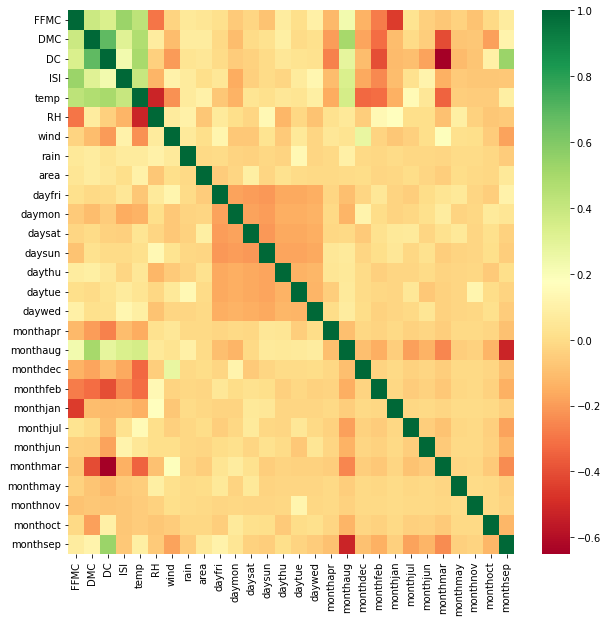

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(forestfires.corr(),cmap="RdYlGn")

(array([  1.,   0.,   0.,   0.,   2.,   2.,   2.,   5.,  68., 437.]),
 array([18.7 , 26.45, 34.2 , 41.95, 49.7 , 57.45, 65.2 , 72.95, 80.7 ,
        88.45, 96.2 ]),
 <BarContainer object of 10 artists>)

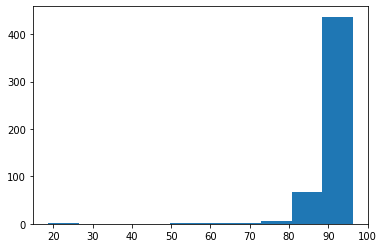

In [5]:
# Graphical Representation of data
#import matplotlib.pyplot as plt
# Histogram
import matplotlib.pyplot as plt
plt.hist(forestfires['FFMC']) 

(array([ 63.,  63.,  49., 114., 113.,  42.,  25.,  23.,   9.,  16.]),
 array([  1.1 ,  30.12,  59.14,  88.16, 117.18, 146.2 , 175.22, 204.24,
        233.26, 262.28, 291.3 ]),
 <BarContainer object of 10 artists>)

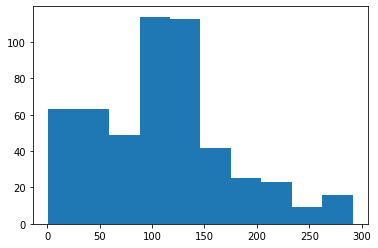

In [6]:
plt.hist(forestfires['DMC']) 

(array([ 67.,  21.,   6.,  10.,  25.,  22.,  40., 136., 151.,  39.]),
 array([  7.9 ,  93.17, 178.44, 263.71, 348.98, 434.25, 519.52, 604.79,
        690.06, 775.33, 860.6 ]),
 <BarContainer object of 10 artists>)

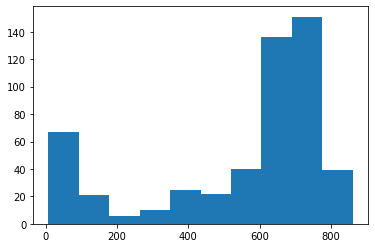

In [7]:
plt.hist(forestfires['DC']) 

In [8]:
forestfires.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
forestfires["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [10]:
##I am taking small as 0 and large as 1
forestfires.loc[forestfires["size_category"]=='small','size_category']=0
forestfires.loc[forestfires["size_category"]=='large','size_category']=1
forestfires["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [11]:
#Normalization being done.
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]

predictors1 = norm_func(predictors)

In [12]:
#data = pd.concat([predictors1,target],axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)



def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model  

In [13]:
X= np.asarray(x_train).astype(np.float32)
Y= np.asarray(y_train).astype(np.float32)

In [14]:
#y_train = pd.DataFrame(y_train)
    
first_model = prep_model([28,50,40,20,1])
first_model.fit(X,Y,epochs=500)
pred_train = first_model.predict(np.array(x_train))

Epoch 1/500
12/12 [==============================] - 2s 2ms/step - loss: 0.6767 - accuracy: 0.6704
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.7313
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.7313
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.7313
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.7313
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.7313
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.7313
Epoch 8/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.7313
Epoch 9/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5731 - accuracy: 0.7313
Epoch 10/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.7313
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8809
Epoch 84/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.8809
Epoch 85/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3048 - accuracy: 0.8809
Epoch 86/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3021 - accuracy: 0.8809
Epoch 87/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8781
Epoch 88/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 0.8920
Epoch 89/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2843 - accuracy: 0.8864
Epoch 90/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3040 - accuracy: 0.8809
Epoch 91/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.8947
Epoch 92/500
12/12 [==============================] - 0s 3ms/step - loss: 0.2710 - accuracy: 0.9058
Epoch 93/500


12/12 [==============================] - 0s 3ms/step - loss: 0.1060 - accuracy: 0.9668
Epoch 165/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.9640
Epoch 166/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1350 - accuracy: 0.9501
Epoch 167/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1075 - accuracy: 0.9529
Epoch 168/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1310 - accuracy: 0.9529
Epoch 169/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.9668
Epoch 170/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9612
Epoch 171/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9612
Epoch 172/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 0.9778
Epoch 173/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9668
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9806
Epoch 246/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9861
Epoch 247/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9695
Epoch 248/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9806
Epoch 249/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9917
Epoch 250/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.9640
Epoch 251/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.9723
Epoch 252/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9861
Epoch 253/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9806
Epoch 254/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0368 - accuracy: 0.9861
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9945
Epoch 327/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9889
Epoch 328/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9834
Epoch 329/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 330/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 331/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9945
Epoch 332/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9972
Epoch 333/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9972
Epoch 334/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9889
Epoch 335/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9889
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 408/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 409/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9917
Epoch 410/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9945
Epoch 411/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 412/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 413/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9778
Epoch 414/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 415/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 416/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9834
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 7.4533e-04 - accuracy: 1.0000
Epoch 489/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9917
Epoch 491/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 492/500
12/12 [==============================] - 0s 3ms/step - loss: 7.3259e-04 - accuracy: 1.0000
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 9.2661e-04 - accuracy: 1.0000
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9834
Epoch 496/500
12/12 [==============================] - 0s 3ms/step - loss: 9.2710e-04 - accuracy: 1.0000
Epoch 497/500
12/12 [==============================] - 0s 3ms/step - loss: 6.9675e-04 - a

In [15]:
#Converting the predicted values to series 
pred_train = pd.Series([i[0] for i in pred_train])

size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"

train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()

0    264
1     97
Name: size_category, dtype: int64

In [16]:
#For training data
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()
confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True)) #100%
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,97,0
small,0,264


In [17]:
#For test data
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"

test["original_class"].value_counts()
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) # 85%
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

5/5 [==============================] - 0s 2ms/step


original_class,large,small
row_0,,
large,28,6
small,14,108
